# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- scipy: https://scipy.org/install/
- gym: https://github.com/openai/gym (**New package to install**)

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import random

In [2]:
"""Plot function similar to Ex1"""
def plot_curves(arr_list, legend_list, color_list, ylabel):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        ylabel (string): label of the Y axis

        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly.
        Do not forget to change the ylabel for different plots.
    """
    # set the figure type
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))

    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Steps")

    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err = 1.96 * arr_err
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3,
                        color=color)
        # save the plot handle
        h_list.append(h)

    # plot legends
    ax.legend(handles=h_list)
    plt.show()

# Q2: Backjack 

Please note, since there is no scaffolding code for this question. Please make sure your implementation is well-tested and the comments are clear to understand. 

In [3]:
# test code for using the "Backjack" implementation from OpenAI
import gym
env = gym.make("Blackjack-v1", natural=False, sab=True)
env.reset()

# iteracting with the environment for 10 time steps using a random policy
for t in range(10): 
    # sample an random action
    action = env.action_space.sample()
    
    # interact with the envrionment
    next_s, reward, done, info, _ = env.step(action)
    
    # print info
    print(f"t = {t}, next_state = {next_s}, reward = {reward}, done = {done}")
    
    # check termination
    if done:
        env.reset()

t = 0, next_state = (11, 2, False), reward = -1.0, done = True
t = 1, next_state = (16, 10, False), reward = 0.0, done = False
t = 2, next_state = (16, 10, False), reward = 1.0, done = True
t = 3, next_state = (16, 5, False), reward = 0.0, done = False
t = 4, next_state = (16, 5, False), reward = 1.0, done = True
t = 5, next_state = (19, 5, False), reward = 0.0, done = False
t = 6, next_state = (24, 5, False), reward = -1.0, done = True
t = 7, next_state = (14, 5, True), reward = -1.0, done = True
t = 8, next_state = (17, 10, False), reward = 0.0, done = False
t = 9, next_state = (17, 10, False), reward = -1.0, done = True


## (a): Implement first-visit Monte-Carlo policy evaluation (See pseudocode on page 92). 

Please read the Example 5.1 on page 93 and reproduce the Figure 1. The policy to be evaluated is the "sticks only on 20 or 21". Please only reproduce the plots after 500, 000 episodes (Usable ace and No usable ace). 

In [4]:
""" CODE HERE YOUR IMPLEMENTATION for Q2-(a) """
from gym.envs.toy_text import blackjack as bj

player_sums = list(range(12, 22))
dealer_showings = list(range(1, 11))

value_m_dict, value_m_usable_dict = dict(), dict()
value_m_size = len(dealer_showings) * len(player_sums)
value_m = np.zeros((len(dealer_showings), len(player_sums)), dtype=float)
value_m_usable = np.zeros_like(value_m)

env = bj.BlackjackEnv(natural=False, sab=True)
player_sum, dealer_showing, is_usable = env.reset()[0]
action = player_sum < 20

for t in range(500000): 
    trajectory = list()
    trajectory.append(player_sum)
    next_s, reward, done, info, _ = env.step(action)
    
    while not done:
        trajectory.append(next_s[0])
        action = next_s[0] < 20
        next_s, reward, done, info, _ = env.step(action)
    
    filtered_trajectory = list(filter(lambda x: x >= 12, trajectory))
    
    for _ in filtered_trajectory:
        key = (dealer_showing, _)
        if is_usable:
            if key in value_m_usable_dict:
                value_m_usable_dict[key].append(reward)
            else:
                value_m_usable_dict[key] = [reward]
        else:
            if key in value_m_dict:
                value_m_dict[key].append(reward)
            else:
                value_m_dict[key] = [reward]
                
    player_sum, dealer_showing, is_usable = env.reset()[0]
    action = player_sum < 20

for is_usable in range(2):
    for i in range(len(dealer_showings)):
        for j in range(len(player_sums)):
            d_s, p_s = dealer_showings[i], player_sums[j]
            if is_usable: 
                value = sum(value_m_usable_dict[d_s, p_s]) / len(value_m_usable_dict[d_s, p_s])
                value_m_usable[i, j] = value
            else:
                value = sum(value_m_dict[d_s, p_s]) / len(value_m_dict[d_s, p_s])
                value_m[i, j] = value

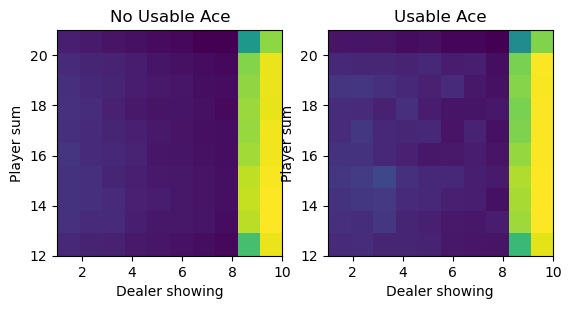

In [11]:
fig, arr = plt.subplots(1, 2)

arr[0].set_title("No Usable Ace")
arr[0].set_xlabel('Dealer showing')
arr[0].set_ylabel('Player sum')
arr[0].imshow(value_m, cmap=plt.cm.viridis, extent=[1, 10, 12, 21])

arr[1].set_title("Usable Ace")
arr[1].set_xlabel('Dealer showing')
arr[1].set_ylabel('Player sum')
arr[1].imshow(value_m_usable, cmap=plt.cm.viridis, extent=[1, 10, 12, 21])


plt.show()

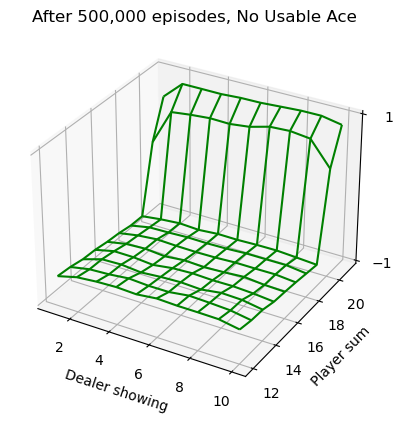

In [15]:
from mpl_toolkits import mplot3d

# function for z axea
def f(z_m, x, y):
    i = x - 1
    j = y - 12
    return z_m[i, j]
 
# x and y axis
x = np.arange(1, 11, 1)
y = np.arange(12, 22, 1)

X, Y = np.meshgrid(x, y)
Z = f(value_m, X, Y)

ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('Dealer showing')
ax.set_ylabel('Player sum')
ax.set_zticks([-1, 1])
ax.set_title('After 500,000 episodes, No Usable Ace')

plt.show()

## (b): Implement first-visit Monte-Carlo control with exploring starts (Monte-Carlo ES on page 99). 

Please read the Example 5.1 and reproduce the Figure 5.2

In [24]:
""" CODE HERE YOUR IMPLEMENTATION for Q2-(b) """
def update_pi(dealer_showings, player_sums, hit_m_usable_dict, stick_m_usable_dict,
              hit_m_dict, stick_m_dict, pi_m_usable, pi_m):
    for is_usable in range(2):
        for i in range(len(dealer_showings)):
            for j in range(len(player_sums)):
                d_s, p_s = dealer_showings[i], player_sums[j]
                if is_usable:
                    try:
                        hit_v = sum(hit_m_usable_dict[d_s, p_s]) / len(hit_m_usable_dict[d_s, p_s])
                        stick_v = sum(stick_m_usable_dict[d_s, p_s]) / len(stick_m_usable_dict[d_s, p_s])
                        value_m_usable[i, j] = max(hit_v, stick_v)
                        if hit_v > stick_v:
                            pi_m_usable[i, j] = 1
                        else:
                            pi_m_usable[i, j] = 0
                    except:
                        pass
                else:
                    try:
                        hit_v = sum(hit_m_dict[d_s, p_s]) / len(hit_m_dict[d_s, p_s])
                        stick_v = sum(stick_m_dict[d_s, p_s]) / len(stick_m_dict[d_s, p_s])
                        value_m[i, j] = max(hit_v, stick_v)
                        if hit_v > stick_v:
                            pi_m[i, j] = 1
                        else:
                            pi_m[i, j] = 0
                    except:
                        pass
    return pi_m_usable, pi_m, value_m_usable, value_m

player_sums = list(range(12, 22))
dealer_showings = list(range(1, 11))

stick_m_dict, hit_m_dict = dict(), dict()
stick_m_usable_dict, hit_m_usable_dict = dict(), dict()

value_m_size = len(dealer_showings) * len(player_sums)
value_m = np.zeros((len(dealer_showings), len(player_sums)), dtype=float)
value_m_usable = np.zeros_like(value_m)

pi_m = np.zeros_like(value_m)
pi_m_usable = np.zeros_like(value_m)

env = bj.BlackjackEnv(natural=False, sab=True)
player_sum, dealer_showing, is_usable = env.reset()[0]
action = random.randint(0, 1)

for t in range(500000): 
    trajectory = list()
    trajectory.append((player_sum, action))
    next_s, reward, done, info, _ = env.step(action)

    while not done:
        if is_usable:
            try:
                action = pi_m_usable[dealer_showings.index(dealer_showing), 
                                     player_sums.index(next_s[0])]
            except:
                action = random.randint(0, 1)
        else:
            try:
                action = pi_m[dealer_showings.index(dealer_showing),
                              player_sums.index(next_s[0])]
            except:
                action = random.randint(0, 1)
        trajectory.append((next_s[0], action))
        next_s, reward, done, info, _ = env.step(int(action))
    
    filtered_trajectory = list(filter(lambda x: x[0] >= 12, trajectory))
    
    for q in filtered_trajectory:
        key = (dealer_showing, q[0])
        if q[1] > 0:
            if is_usable:
                if key in hit_m_usable_dict:
                    hit_m_usable_dict[key].append(reward)
                else:
                    hit_m_usable_dict[key] = [reward]
            else:
                if key in hit_m_dict:
                    hit_m_dict[key].append(reward)
                else:
                    hit_m_dict[key] = [reward]
        else:
            if is_usable:
                if key in stick_m_usable_dict:
                    stick_m_usable_dict[key].append(reward)
                else:
                    stick_m_usable_dict[key] = [reward]
            else:
                if key in stick_m_dict:
                    stick_m_dict[key].append(reward)
                else:
                    stick_m_dict[key] = [reward]
                    
    pi_m_usable, pi_m, value_m_usable, value_m = update_pi(dealer_showings, player_sums, 
                                                           hit_m_usable_dict, stick_m_usable_dict, 
                                                           hit_m_dict, stick_m_dict, 
                                                           pi_m_usable, pi_m)
                
    player_sum, dealer_showing, is_usable = env.reset()[0]
    action = random.randint(0, 1)

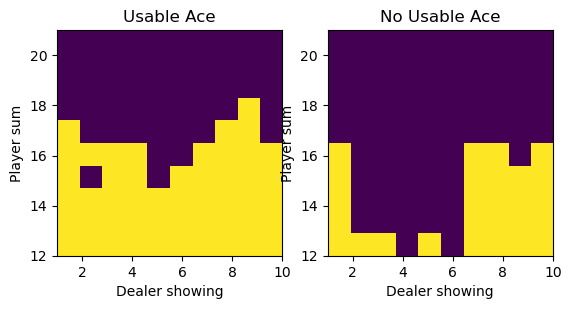

In [82]:
fig, arr = plt.subplots(1, 2)

arr[0].set_title("Usable Ace")
arr[0].set_xlabel('Dealer showing')
arr[0].set_ylabel('Player sum')
arr[0].imshow(np.rot90(pi_m_usable), cmap=plt.cm.viridis, extent=[1, 10, 12, 21])

arr[1].set_title("No Usable Ace")
arr[1].set_xlabel('Dealer showing')
arr[1].set_ylabel('Player sum')
arr[1].imshow(np.rot90(pi_m), cmap=plt.cm.viridis, extent=[1, 10, 12, 21])

plt.show()

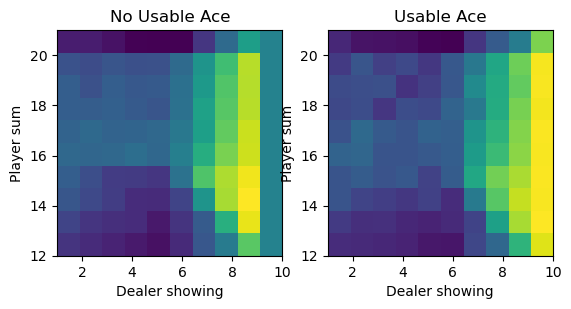

In [25]:
fig, arr = plt.subplots(1, 2)

arr[0].set_title("No Usable Ace")
arr[0].set_xlabel('Dealer showing')
arr[0].set_ylabel('Player sum')
arr[0].imshow(value_m, cmap=plt.cm.viridis, extent=[1, 10, 12, 21])

arr[1].set_title("Usable Ace")
arr[1].set_xlabel('Dealer showing')
arr[1].set_ylabel('Player sum')
arr[1].imshow(value_m_usable, cmap=plt.cm.viridis, extent=[1, 10, 12, 21])


plt.show()

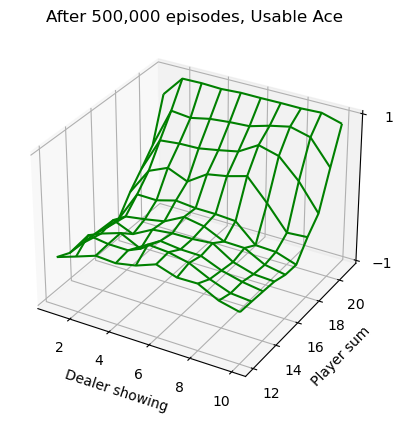

In [26]:
from mpl_toolkits import mplot3d

# function for z axea
def f(z_m, x, y):
    i = x - 1
    j = y - 12
    return z_m[i, j]
 
# x and y axis
x = np.arange(1, 11, 1)
y = np.arange(12, 22, 1)

X, Y = np.meshgrid(x, y)
Z = f(value_m_usable, X, Y)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('Dealer showing')
ax.set_ylabel('Player sum')
ax.set_zticks([-1, 1])
ax.set_title('After 500,000 episodes, Usable Ace')
plt.show()

# Q3: Four Rooms, re-visited

In [66]:
"""DO NOT CHANGE"""
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}

        # define the start state
        self.start_state = [0, 0]

        # define the goal state
        self.goal_state = [10, 10]

        # maximal time steps
        self.max_time_steps = 459

        # track the time step
        self.t = 0

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        # reset the agent state to be [0, 0]
        state = self.start_state
        # reset the reward to be 0
        reward = 0
        # reset the termination flag
        done = False
        # reset the time step tracker
        self.t = 0
        return state, reward, done

    def step(self, state, act):
        """
        Args:
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        # Increase the time step
        self.t += 1

        # With probability 0.8, the agent takes the correct direction.
        # With probability 0.2, the agent takes one of the two perpendicular actions.
        # For example, if the correct action is "LEFT", then
        #     - With probability 0.8, the agent takes action "LEFT";
        #     - With probability 0.1, the agent takes action "UP";
        #     - With probability 0.1, the agent takes action "DOWN".
        if np.random.uniform() < 0.2:
            if act == "LEFT" or act == "RIGHT":
                act = np.random.choice(["UP", "DOWN"], 1)[0]
            else:
                act = np.random.choice(["RIGHT", "LEFT"], 1)[0]

        # Compute the next state
        next_state = self.take_action(state, act)

        # Compute the reward
        reward = 1.0 if next_state == [10, 10] else 0.0

        # Check the termination
        # If the agent reaches the goal, reward = 1, done = True
        # If the time steps reaches the maximal number, reward = 0, done = True.
        if next_state == [10, 10] or self.t == self.max_time_steps:
            done = True
        else:
            done = False

        return next_state, reward, done

    def take_action(self, state, act):
        """
        Input args:
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy

In [67]:
""" CODE HERE YOUR IMPLEMENTATION for Q3-(a) """
# Implementation of the one-policy first-vist Monte-Carlo control (for ε-soft policies) here.
# To debug your code, you can use run_num = 5 and episode_num = 1e3
# To report the finial results, please use run_num = 10 and episode_num = 1e4

def epsilon_soft(state, policy, action_list, epsilon = 0.01):
    optimal_acts = policy[tuple(state)]
    if np.random.uniform() < epsilon:
        act = np.random.choice(action_list, 1)[0]
    else:
        act = np.random.choice(optimal_acts, 1)[0]
    return act
                
def update_q_values_and_policy(trajectory, reward, q_values, policy, gamma = 0.95):
    T = len(trajectory)
    for i in range(T-1, -1, -1):
        if trajectory[i] not in trajectory[:(i-1)]:
            G = (gamma ** (T-i-1)) * reward
            Q_count, Q_value = q_values[trajectory[i]]
            Q_value += (G-Q_value) / (Q_count+1)
            Q_count += 1
            q_values[trajectory[i]] = [Q_count, Q_value]

            current_state, current_act = trajectory[i]
            current_policy = policy[trajectory[i][0]]
            current_q_max = q_values[(current_state, current_policy[0])][1]

            if Q_value > current_q_max:
                policy[trajectory[i][0]] = [current_act]
            if Q_value == current_q_max:
                if current_act not in current_policy:
                    policy[trajectory[i][0]].append(current_act)

    return q_values, policy
        
def run_epsilon_soft(run_num, time_step, epsilon, gamma = 0.95):
    action_list = ['LEFT', 'RIGHT', 'DOWN', 'UP']
    env = FourRooms()
    state, reward, done = env.reset()
    action_mapping = len(env.state_space) * [action_list]
    
    results_rewards = np.empty((run_num, time_step))
    
    for r in range(run_num):
        policy = {tuple(env.state_space[i]): action_mapping[i] for i in range(len(env.state_space))}
        q_list = [(tuple(env.state_space[i]), action_list[j]) for i in range(len(env.state_space)) 
                  for j in range(len(action_list))]
        q_values = {q_list[i]: [0, 0.0] for i in range(len(q_list))}
        
        for t in range(time_step):
            trajectory = list()
            action = epsilon_soft(state, policy, action_list, epsilon=epsilon)
            trajectory.append((tuple(state), action))
            next_state, reward, done = env.step(state, action)
            
            while not done:
                action = epsilon_soft(next_state, policy, action_list, epsilon=epsilon)
                trajectory.append((tuple(next_state), action))
                next_state, reward, done = env.step(next_state, action)

            trajectory_len = len(trajectory)
            discounted_reward = reward * (gamma**(trajectory_len-1))
            results_rewards[r, t] = discounted_reward
            
            if reward == 1.0:
                q_values, policy = update_q_values_and_policy(trajectory, reward, q_values, policy, gamma=gamma)
            state, reward, done = env.reset()
            
    return results_rewards

In [68]:
results_rewards_0 = run_epsilon_soft(10, 10000, 0.1, gamma = 0.98)
results_rewards_1 = run_epsilon_soft(10, 10000, 0.01, gamma = 0.98)
results_rewards_2 = run_epsilon_soft(10, 10000, 0.0, gamma = 0.98)

<Figure size 640x480 with 0 Axes>

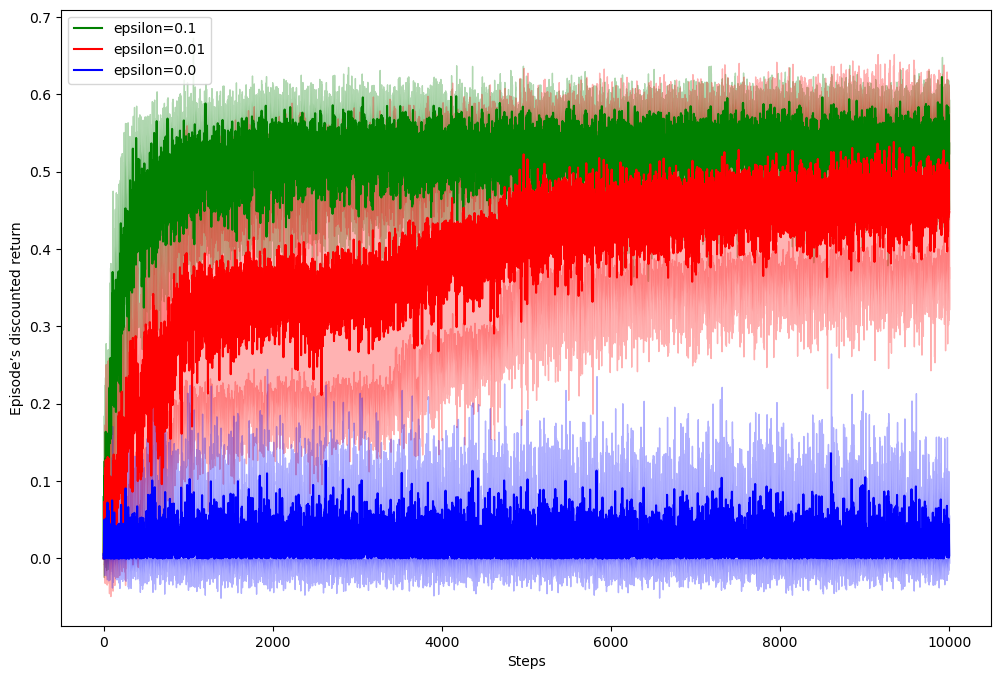

In [69]:
plot_curves([results_rewards_0, results_rewards_1, results_rewards_2],
            ["epsilon=0.1", "epsilon=0.01", "epsilon=0.0"],
            ["g", "r", "b"],
            "Episode’s discounted return")

## Q5: Racktrack

Please note, we provde you with the implementation of the two Racetrack domains in the Figure 5.5.

In [87]:
# Define the Racetrack domain 1
racetrack_v1_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]])

racetrack_v2_arr = np.array([
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

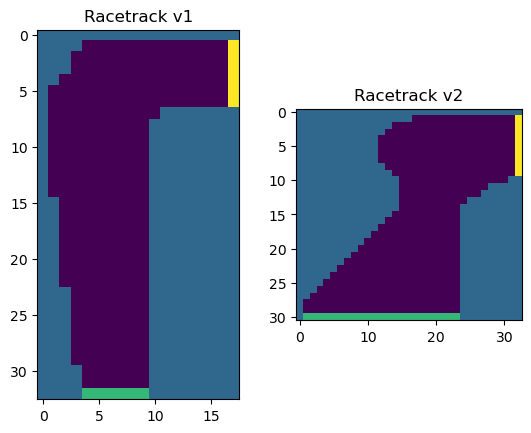

In [88]:
fig, arr = plt.subplots(1, 2)
arr[0].set_title("Racetrack v1")
arr[0].imshow(racetrack_v1_arr)
arr[1].set_title("Racetrack v2")
arr[1].imshow(racetrack_v2_arr)
plt.show()

In [89]:
"""Implementation of the Racetrack environment. Do not change"""
class Racetrack(object):
    def __init__(self, version):
        # Load the pre-defined the domain having the following representation
        #   - 1: track cell
        #   - 0: empty cell
        #   - 2: empty cell on the start line
        #   - 3: empty cell on the finish line
        if version == "v1":
            self.domain_arr = racetrack_v1_arr.copy()
        else:
            self.domain_arr = racetrack_v2_arr.copy()

        # domain size
        self.height, self.width = self.domain_arr.shape

        # State space consists of:
        # Agent location
        self.empty_cell_locs = self.render_cell_locations(val=0.0)
        self.track_cell_locs = self.render_cell_locations(val=1.0)
        self.start_cell_locs = self.render_cell_locations(val=2.0)
        self.finish_cell_locs = self.render_cell_locations(val=3.0)

        # Action space
        self.action_space = [[-1, -1], [-1, 0], [-1, 1],
                             [0, -1], [0, 0], [0, 1],
                             [1, -1], [1, 0], [1, 1]]

        # construct the state space
        self.state_space = []
        for loc in self.start_cell_locs + self.empty_cell_locs + self.finish_cell_locs:
            for i in range(5):
                for j in range(5):
                    self.state_space.append(loc + [i, j])

        # track the agent's location
        self.state = None
        self.action = None
        self.t = None

    def reset(self):
        # randomly select one cell from the start line
        start_loc = random.sample(self.start_cell_locs, 1)[0]
        # reset the velocity to be zero for both x and y directions
        start_vel = [0, 0]
        # the state is a combination of location and velocity
        # for example: [loc_x, loc_y, vel_x, vel_y]
        state = start_loc + start_vel
        # reward
        reward = None
        # done
        done = False
        # track agent's location
        self.state = tuple(state)
        self.t = 0
        return state, reward, done

    def step(self, state, action):
        """
        Args:
            state (list): a list variable consists of agent's location + agent's current velocity. e.g., [x, y, v_x, v_y]
            action (list): a list variable consists of agent's velocity increments. e.g., [increments_v_x, increments_v_y]
        """
        # reward is -1 for every time step until the agent passes the finish line
        reward = -1
        self.t += 1
        
        # with the probability = 0.1, set action = [0, 0]
        if np.random.random() < 0.1:
            action = [0, 0]

        # update the velocity components
        # note that, both velocity is discrete and constraint within [0, 4]
        next_vel_x = np.clip(state[2] + action[0], a_min=0, a_max=4)
        next_vel_y = np.clip(state[3] + action[1], a_min=0, a_max=4)
        next_state_vel = [next_vel_x, next_vel_y]

        # only the cells on the start line can have both 0 velocities
        if next_state_vel == [0, 0]:
            if state not in self.start_cell_locs:
                # non-zero for velocities
                if state[2] == 0 and state[3] != 0:
                    next_state_vel = [0, 1]
                if state[2] != 0 and state[3] == 0:
                    next_state_vel = [1, 0]
                if state[2] != 0 and state[3] != 0:
                    non_zero_idx = random.sample([0, 1], 1)[0]
                    next_state_vel[non_zero_idx] = 1

        # update the next state location based on the updated velocities
        next_state_loc = [np.clip(state[0] + next_state_vel[0], a_min=0, a_max=self.width-1),
                          np.clip(state[1] + next_state_vel[1], a_min=0, a_max=self.height-1)]

        # check whether the agent hits the track
        if next_state_loc in self.track_cell_locs:
            # move back to the start line
            next_state_loc = random.sample(self.start_cell_locs, 1)[0]
            # reduce velocity to be 0s
            next_state_vel = [0, 0]
            # episode continue
            done = False
            # next state
            next_state = next_state_loc + next_state_vel
            return next_state, reward, done

        # check whether the agent pass the finish line
        if next_state_loc in self.finish_cell_locs:
            next_state = next_state_loc + next_state_vel
            done = True
            return next_state, 0, done

        # otherwise combine the next state
        next_state = next_state_loc + next_state_vel
        # termination
        done = False

        # track the agent's state
        self.state = tuple(next_state)
        self.action = action
        return next_state, reward, done

    def render_cell_locations(self, val):
        row_loc_indices, col_loc_indices = np.where(self.domain_arr == val)
        cell_locations = [[c, (self.height-1) - r] for r, c in zip(row_loc_indices, col_loc_indices)]
        return cell_locations

    def render(self):
        plt.clf()
        plt.title(f"s = {self.state}, a = {self.action}")
        plot_arr = self.domain_arr.copy()
        plot_arr[(self.height - 1) - self.state[1], self.state[0]] = 4
        plt.imshow(plot_arr)
        plt.show(block=False)
        plt.pause(0.01)

## (a): Implement first-visit Monte-Carlo control with a epsilon-greedy policy (epsilon = 0.1)
    - Plot the learning curves for the two tracks.
    - Use running trials number = 10 and episodes number = 1e4

In [62]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(a) """
# Implement here and use the plotting function above to plot the learning curve

def epsilon_soft(state, policy, action_list, epsilon = 0.01):
    optimal_acts = policy[tuple(state)]
    if np.random.uniform() < epsilon:
        index = np.random.choice(range(len(action_list)), 1)[0]
        act = action_list[index]
    else:
        index = np.random.choice(range(len(optimal_acts)), 1)[0]
        act = optimal_acts[index]
    return act
                
def update_q_values_and_policy(trajectory, action_space, q_values, policy, gamma):
    T = len(trajectory)
    for i in range(T-1, -1, -1):
        if trajectory[i] not in trajectory[:(i-1)]:
            if i == T - 1:
                G = 0
            else:
                n = T - i
                G = (1 - gamma ** (n-1)) / (gamma - 1)
            Q_count, Q_value = q_values[trajectory[i]]
            Q_value += (G-Q_value) / (Q_count+1)
            Q_count += 1
            q_values[trajectory[i]] = [Q_count, Q_value]

            current_state, current_act = trajectory[i]

            current_qs = [q_values[(current_state, action_space[i])][1] for i in range(len(action_space))]
            q_max = max(current_qs)
            greedy_actions = [action_space[i] for i in range(len(current_qs)) if current_qs[i] == q_max]   
            policy[current_state] = greedy_actions

    return q_values, policy
        
def racetrack_epsilon_soft(version, run_num, time_step, epsilon, gamma = 0.95):
    env = Racetrack(version)
    state, reward, done = env.reset()

    results_rewards = np.empty((run_num, time_step))
    
    for r in range(run_num):
        action_space = [tuple(env.action_space[i]) for i in range(len(env.action_space))]
        policy = {tuple(env.state_space[i]): action_space for i in range(len(env.state_space))}
        q_list = [(tuple(env.state_space[i]), action_space[j]) for i in range(len(env.state_space)) 
                  for j in range(len(env.action_space))]
        q_values = {q_list[i]: [0, 0.0] for i in range(len(q_list))}
        
        for t in range(time_step):
            trajectory = list()
            action = epsilon_soft(state, policy, env.action_space, epsilon=epsilon)
            trajectory.append((tuple(state), tuple(action)))
            next_state, reward, done = env.step(state, action)
            
            while not done:
                action = epsilon_soft(next_state, policy, env.action_space, epsilon=epsilon)
                trajectory.append((tuple(next_state), tuple(action)))
                next_state, reward, done = env.step(next_state, action)
                
            T = len(trajectory)
            discounted_reward = (1 - gamma ** (T-1)) / (gamma - 1)
            results_rewards[r, t] = discounted_reward
            
            q_values, policy = update_q_values_and_policy(trajectory, action_space, q_values, policy, gamma)
            
            state, reward, done = env.reset()
            
    return results_rewards, trajectory

In [63]:
results_rewards_0, trajectory = racetrack_epsilon_soft("v1", 10, 2000, 0.1, gamma = 0.99)

<Figure size 640x480 with 0 Axes>

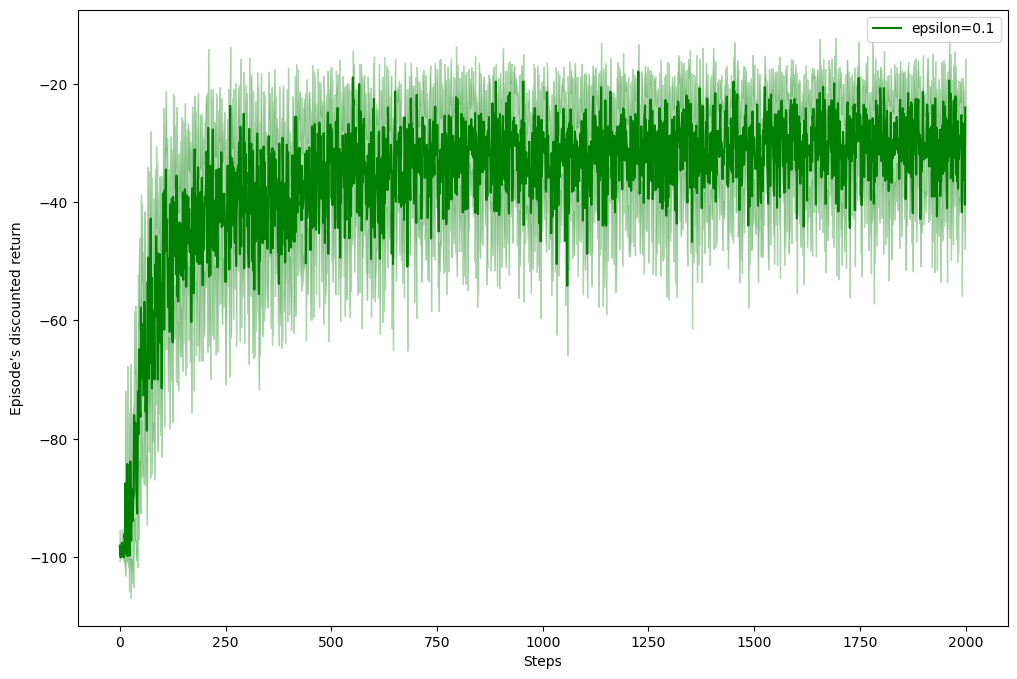

In [64]:
plot_curves([results_rewards_0],
            ["epsilon=0.1"],
            ["g"],
            "Episode’s discounted return")

## (b): Implement off-policy Monte-Carlo control. Please specify what behavior policy you are using.
    - Plot the learning curves for the two tracks
    - Using running trials number = 10 and episodes number = 1e4

In [90]:
""" CODE HERE YOUR IMPLEMENTATION for Q5-(b) """
# Implement here and use the plotting function above to plot the learning curve

def epsilon_soft(state, policy, action_list, epsilon = 0.01):
    optimal_acts = policy[tuple(state)]
    if np.random.uniform() < epsilon:
        index = np.random.choice(range(len(action_list)), 1)[0]
        act = action_list[index]
    else:
        index = np.random.choice(range(len(optimal_acts)), 1)[0]
        act = optimal_acts[index]
    return act
                
def update_q_values_and_policy(trajectory, action_space, q_values, policy, 
                               q_values_target, c_values_target, policy_target, epsilon, gamma):
    W = 1
    T = len(trajectory)
    exit = False
    
    for i in range(T-1, -1, -1):
        if trajectory[i] not in trajectory[:(i-1)]:
            if i == T - 1:
                G = 0
            else:
                n = T - i
                G = (1 - gamma ** (n-1)) / (gamma - 1)
            Q_count, Q_value = q_values[trajectory[i]]
            Q_value += (G-Q_value) / (Q_count+1)
            Q_count += 1
            q_values[trajectory[i]] = [Q_count, Q_value]

            current_state, current_act = trajectory[i]
            old_policy = policy[current_state]

            current_qs = [q_values[(current_state, action_space[i])][1] for i in range(len(action_space))]
            q_max = max(current_qs)
            greedy_actions = [action_space[i] for i in range(len(current_qs)) if current_qs[i] == q_max]   
            policy[current_state] = greedy_actions
            
            if not exit:
                c_values_target[trajectory[i]] += W
                q_values_target[trajectory[i]] += ((W/c_values_target[trajectory[i]]) 
                                                   * (G-q_values_target[trajectory[i]]))
        
                current_qs = [q_values_target[(current_state, action_space[i])] for i in range(len(action_space))]
                q_max_target = max(current_qs)
                greedy_actions = [action_space[i] for i in range(len(current_qs)) if current_qs[i] == q_max_target]
                
                policy_target[current_state] = greedy_actions
                
                if current_act not in greedy_actions:
                    exit = True
                    
                if current_act in old_policy:
                    b = ((1-epsilon)/len(old_policy)) + (epsilon/len(action_space))
                else:
                    b = epsilon / len(action_space)
                W /= b
            
    return q_values, policy, q_values_target, c_values_target, policy_target
        
def run_greedy(version, policy_target, gamma):
    env = Racetrack(version)
    state, reward, done = env.reset()
    
    trajectory = list()
    optimal_acts = policy_target[tuple(state)]
    index = np.random.choice(range(len(optimal_acts)), 1)[0]
    action = optimal_acts[index]
    trajectory.append((tuple(state), tuple(action)))
    next_state, reward, done = env.step(state, action)
    
    while not done:
        optimal_acts = policy_target[tuple(next_state)]
        index = np.random.choice(range(len(optimal_acts)), 1)[0]
        action = optimal_acts[index]
        trajectory.append((tuple(next_state), tuple(action)))
        next_state, reward, done = env.step(next_state, action)
                 
    T = len(trajectory)
   
    discounted_reward = (1 - gamma ** (T-1)) / (gamma - 1)
            
    return discounted_reward, trajectory    
    
def racetrack_off_policy(version, run_num, time_step, epsilon, gamma = 0.95, max_t = 500):
    env = Racetrack(version)
    state, reward, done = env.reset()
    
    results_rewards = np.empty((run_num, time_step))
    
    for r in range(run_num):
        action_space = [tuple(env.action_space[i]) for i in range(len(env.action_space))]
        policy = {tuple(env.state_space[i]): action_space for i in range(len(env.state_space))}
        policy_target = policy.copy()
        
        q_list = [(tuple(env.state_space[i]), action_space[j]) for i in range(len(env.state_space)) 
                  for j in range(len(env.action_space))]
        q_values = {q_list[i]: [0, 0.0] for i in range(len(q_list))}
        q_values_target = {q_list[i]: 0.0 for i in range(len(q_list))}
        c_values_target = q_values_target.copy()
        
        t = 0
        while t < time_step:
            trajectory = list()
            action = epsilon_soft(state, policy, env.action_space, epsilon=epsilon)
            trajectory.append((tuple(state), tuple(action)))
            next_state, reward, done = env.step(state, action)
            
            while not done:
                action = epsilon_soft(next_state, policy, env.action_space, epsilon=epsilon)
                trajectory.append((tuple(next_state), tuple(action)))
                next_state, reward, done = env.step(next_state, action)
                
            T = len(trajectory)
            
            if T > max_t:
                state, reward, done = env.reset()
                continue
            
            result = update_q_values_and_policy(trajectory, action_space, q_values, policy,
                                                q_values_target, c_values_target, policy_target, epsilon, gamma)
            
            q_values, policy, q_values_target, c_values_target, policy_target = result
            
            discounted_reward, trajectory = run_greedy(version, policy_target, gamma)
            
            results_rewards[r, t] = discounted_reward
            
            state, reward, done = env.reset()
            
            t += 1
            
    return results_rewards, trajectory

In [92]:
results_rewards_0, trajectory = racetrack_off_policy("v1", 10, 2000, 0.1, gamma = 0.99, max_t = 500)

<Figure size 640x480 with 0 Axes>

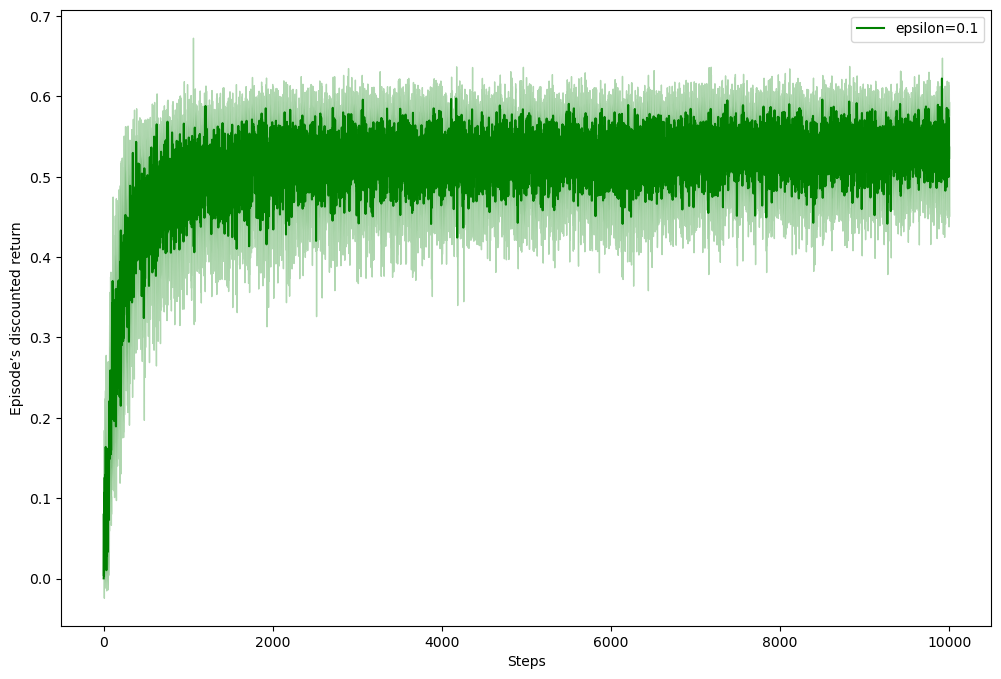

In [84]:
plot_curves([results_rewards_0],
            ["epsilon=0.1"],
            ["g"],
            "Episode’s discounted return")

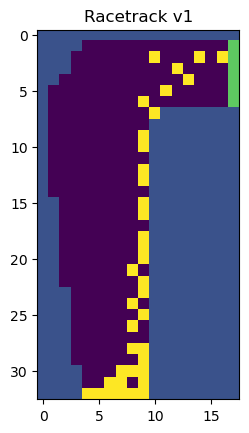

In [83]:
def plot_trajectory(version, trajectory):
    fig, arr = plt.subplots(1, 1)
    if version == "v1":
        track = racetrack_v1_arr
        arr.set_title("Racetrack v1")
    else:
        track = racetrack_v2_arr
    y, x = track.shape
    for each in trajectory:
        state = np.array(list(each[0]))
        trans_state = (y-1-state[1]) ,state[0]
        track[trans_state] = 4
    arr.imshow(track)
    plt.show()
    
plot_trajectory("v1", trajectory)